In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# view the shape of the dataset
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
#view the classes in the dataset
classes = np.unique(y_train)
print("Classes in the dataset:", classes)

Classes in the dataset: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# take only dog,cat and deer classes
dog_cat_deer_classes = [3, 5, 4]  # Dog, Cat, Deer
train_mask = np.isin(y_train, dog_cat_deer_classes)
test_mask = np.isin(y_test, dog_cat_deer_classes)
x_train_filtered = x_train[train_mask.flatten()]
y_train_filtered = y_train[train_mask]
x_test_filtered = x_test[test_mask.flatten()]
y_test_filtered = y_test[test_mask]


In [5]:
label_map = {3: 0, 5: 1, 4: 2}
y_train_filtered = np.vectorize(label_map.get)(y_train_filtered)
y_test_filtered = np.vectorize(label_map.get)(y_test_filtered)

In [6]:
# Normalize the images
x_train_filtered = x_train_filtered.astype('float32') / 255.0
x_test_filtered = x_test_filtered.astype('float32') / 255.0

In [7]:
# view the normalized data img
print("Normalized training data shape:", x_train_filtered.shape)
print("Normalized test data shape:", x_test_filtered.shape)


Normalized training data shape: (15000, 32, 32, 3)
Normalized test data shape: (3000, 32, 32, 3)


In [8]:
# train a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(dog_cat_deer_classes), activation='softmax')
])

c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
# Train the model
model.fit(x_train_filtered, y_train_filtered, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test_filtered, y_test_filtered, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4575 - loss: 1.0256 - val_accuracy: 0.5940 - val_loss: 0.8592
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6079 - loss: 0.8387 - val_accuracy: 0.6507 - val_loss: 0.7696
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6535 - loss: 0.7613 - val_accuracy: 0.6880 - val_loss: 0.7142
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6832 - loss: 0.7065 - val_accuracy: 0.6133 - val_loss: 0.8074
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7065 - loss: 0.6666 - val_accuracy: 0.6873 - val_loss: 0.6745
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7286 - loss: 0.6204 - val_accuracy: 0.7340 - val_loss: 0.6261
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7529 - loss: 0.5929 - val_accuracy: 0.7260 - val_loss: 0.6239
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7678 - loss: 0.5559 - val_accu

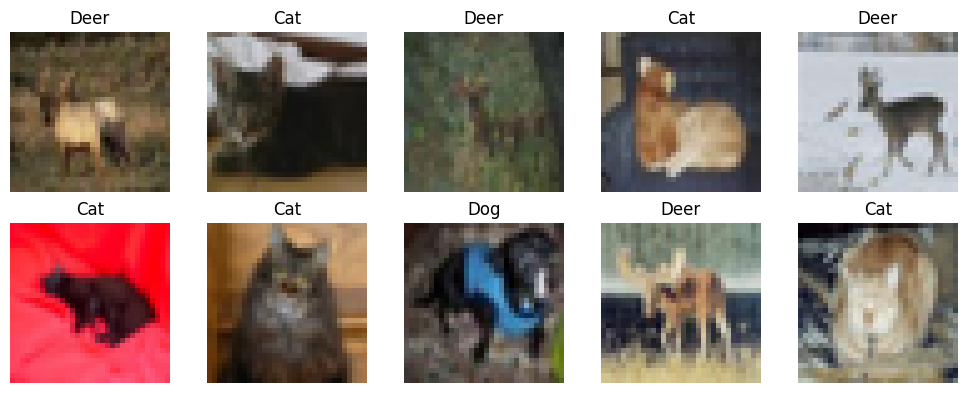

In [11]:
import matplotlib.pyplot as plt
class_names = ['Cat', 'Dog', 'Deer']
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_filtered[i])
    plt.title(class_names[y_train_filtered[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# save the model
model.save('cifar10_dog_cat_deer_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: Deer with confidence 95.58%


In [27]:
# load the model
loaded_model = models.load_model('cifar10_dog_cat_deer_model.h5')
# Evaluate the loaded model
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test_filtered, y_test_filtered,
                                                            verbose=2)
print(f"\nLoaded Model Test Accuracy: {loaded_test_acc * 100:.2f}%")

94/94 - 1s - 6ms/step - accuracy: 0.7370 - loss: 0.9169

Loaded Model Test Accuracy: 73.70%


In [28]:
# Predict the class of the uploaded image
from tensorflow.keras.preprocessing import image
img_path = 'cat1.jpeg'  # Replace with your image path
img = image.load_img(img_path, target_size=(32, 32))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  
img = img.astype('float32') / 255.0  
# Predict the class
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0]) 
print(f"Predicted class: {predicted_class} ({class_names[predicted_class]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: 1 (Dog)
